In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Datasets/KenPom Barttorvik.csv")
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,276,238,199,19,176,164,47,122,51,249
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,13,33,8,156,106,10,314,2,263,7
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,16,50,37,196,7,195,134,8,14,47
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,58,86,76,127,69,59,284,12,8,69
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,274,31,22,304,34,97,254,15,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,225,18,115,181,61,209,16,22,32,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,111,160,179,55,131,127,214,27,28,203
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,301,231,206,89,236,339,190,170,12,179
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,301,51,35,98,12,118,117,60,2,57


In [3]:
# Define conditions and corresponding values
conditions = [
    (df['ROUND'] == 1),
    (df['ROUND'] == 2),
    (df['ROUND'] == 4),
    (df['ROUND'] == 8),
    (df['ROUND'] == 16),
    (df['ROUND'] == 32),
    (df['ROUND'] == 64)
]

values = [6, 5, 4, 3, 2, 1, 0]

# Create a new column based on conditions
df['WINS'] = np.select(conditions, values, default=None)
df['SEED2'] = df['SEED']**2
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,WINS,SEED2
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,199,19,176,164,47,122,51,249,0,196
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,8,156,106,10,314,2,263,7,4,16
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,37,196,7,195,134,8,14,47,2,4
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,76,127,69,59,284,12,8,69,0,16
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,22,304,34,97,254,15,155,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,115,181,61,209,16,22,32,49,2,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,179,55,131,127,214,27,28,203,2,144
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,206,89,236,339,190,170,12,179,0,169
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,35,98,12,118,117,60,2,57,2,9


In [4]:
df.shape

(1079, 105)

In [5]:
df_train = df[df['YEAR'] != 2024]
df_train = df_train[df_train['ROUND'] != 68]
df_test = df[df['YEAR'] == 2024]
df_test = df_test[df_test['ROUND'] != 68]


In [6]:
X_train = df_train.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND','WINS'], axis=1)
y_train = df_train['WINS']
X_test = df_test.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND','WINS'], axis=1)  
y_test = df_test['WINS']

In [7]:
df_test.shape

(64, 105)

In [8]:
X_train.columns

Index(['SEED', 'K TEMPO', 'K TEMPO RANK', 'KADJ T', 'KADJ T RANK', 'K OFF',
       'KO RANK', 'KADJ O', 'KADJ O RANK', 'K DEF', 'KD RANK', 'KADJ D',
       'KADJ D RANK', 'KADJ EM', 'KADJ EM RANK', 'BADJ EM', 'BADJ O', 'BADJ D',
       'BARTHAG', 'GAMES', 'W', 'L', 'WIN%', 'EFG%', 'EFG%D', 'FTR', 'FTRD',
       'TOV%', 'TOV%D', 'OREB%', 'DREB%', 'OP OREB%', 'OP DREB%', 'RAW T',
       '2PT%', '2PT%D', '3PT%', '3PT%D', 'BLK%', 'BLKED%', 'AST%', 'OP AST%',
       '2PTR', '3PTR', '2PTRD', '3PTRD', 'BADJ T', 'AVG HGT', 'EFF HGT', 'EXP',
       'TALENT', 'FT%', 'OP FT%', 'PPPO', 'PPPD', 'ELITE SOS', 'WAB',
       'BADJ EM RANK', 'BADJ O RANK', 'BADJ D RANK', 'BARTHAG RANK',
       'EFG% RANK', 'EFGD% RANK', 'FTR RANK', 'FTRD RANK', 'TOV% RANK',
       'TOV%D RANK', 'OREB% RANK', 'DREB% RANK', 'OP OREB% RANK',
       'OP DREB% RANK', 'RAW T RANK', '2PT% RANK', '2PT%D RANK', '3PT% RANK',
       '3PT%D RANK', 'BLK% RANK', 'BLKED% RANK', 'AST% RANK', 'OP AST% RANK',
       '2PTR RANK', '3PTR RA

In [9]:
# Fit 
model = LinearRegression()
model.fit(X_train, y_train)
R2train = model.score(X_train, y_train)
print("Train R^2 score:", R2train)
# Predict
y_pred = model.predict(X_test)
# Score
R2 = model.score(X_test, y_test)
print("Test R^2 score:", R2)


Train R^2 score: 0.4467374477564482
Test R^2 score: 0.3924204002655295


In [10]:
X_test

,SEED,K TEMPO,K TEMPO RANK,KADJ T,KADJ T RANK,K OFF,KO RANK,KADJ O,KADJ O RANK,K DEF,...,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,SEED2
0,14,66.7747,274,65.8933,268,107.8410,122,107.0090,162,99.7096,...,238,199,19,176,164,47,122,51,249,196
1,4,74.1625,7,72.6461,9,121.7120,2,125.6010,2,108.0310,...,33,8,156,106,10,314,2,263,7,16
2,2,73.3760,11,71.8379,16,117.6530,10,121.1250,8,96.9086,...,50,37,196,7,195,134,8,14,47,4
3,4,70.9629,54,69.7887,58,117.3640,14,120.5790,10,95.7924,...,86,76,127,69,59,284,12,8,69,16
4,3,66.8428,270,65.6032,281,117.2620,15,122.4900,6,104.1660,...,31,22,304,34,97,254,15,155,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,16,62.5685,361,61.2530,361,97.4514,315,95.7835,334,99.3912,...,317,328,308,362,250,11,318,42,350,256
64,7,66.6789,275,64.8206,316,110.6500,71,113.4310,64,99.4722,...,2,24,270,95,268,280,71,47,82,49
65,15,75.4183,1,75.1443,1,104.9380,187,105.5520,191,98.5188,...,145,192,56,89,195,23,189,32,302,225
66,5,65.7697,316,65.1538,307,113.1420,33,120.0600,13,104.7460,...,20,12,192,50,40,226,38,188,4,25


In [11]:
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':y_pred})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.628941
1,Alabama,4,1.152366
2,Arizona,2,2.495099
3,Auburn,0,1.404897
4,Baylor,1,1.210641
...,...,...,...
63,Wagner,0,0.386041
64,Washington St.,1,0.942786
65,Western Kentucky,0,0.147276
66,Wisconsin,0,1.466803


In [12]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
43,Northwestern,1,1.006460,0.000042
52,South Dakota St.,0,-0.007889,0.000062
28,Kansas,1,0.984523,0.00024
32,Marquette,2,1.967138,0.00108
13,Creighton,2,1.967083,0.001084
...,...,...,...,...
23,Houston,2,4.233159,4.986998
46,Purdue,5,2.540643,6.048439
1,Alabama,4,1.152366,8.109021
12,Connecticut,6,3.074103,8.560874


It did really good on McNeese St, Kansas, Longwood, and Oregon. While it did bad on North Carolina St, Connecticut, and Alabama.

In [13]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
23,Houston,2,4.233159,4.986998
12,Connecticut,6,3.074103,8.560874
46,Purdue,5,2.540643,6.048439
2,Arizona,2,2.495099,0.245123
41,North Carolina,2,2.478138,0.228616
...,...,...,...,...
30,Long Beach St.,0,0.103385,0.010688
31,Longwood,0,0.091843,0.008435
52,South Dakota St.,0,-0.007889,0.000062
33,McNeese St.,0,-0.053949,0.002911


The team that it predicted to get the most wins was Houston, followed by Connecticut and Purdue. This is pretty accurate since Houston barring suffering a injury to its best player would have most likely gotten further in the tournament while the next two were the winner and runner-up.

In [14]:
def getSpecificTeam(team):
    print(predictions_df[predictions_df['TEAM'] == team])

In [15]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.0915962584096603


In [16]:
coefs = pd.Series(model.coef_, X_train.columns)
coefs.sort_values(ascending=False)

KADJ D     89.425275
KADJ EM    89.304206
PPPO       39.896824
PPPD       22.816070
RAW T       1.119760
             ...    
K OFF      -0.434942
EXP        -0.737215
K TEMPO    -1.074264
BARTHAG    -2.047888
KADJ O    -89.350480
Length: 95, dtype: float64

In [17]:
print(df_train['ROUND'].min(),df_train['ROUND'].max())

1 64


Text(0.5, 1.0, 'Year vs. R2')

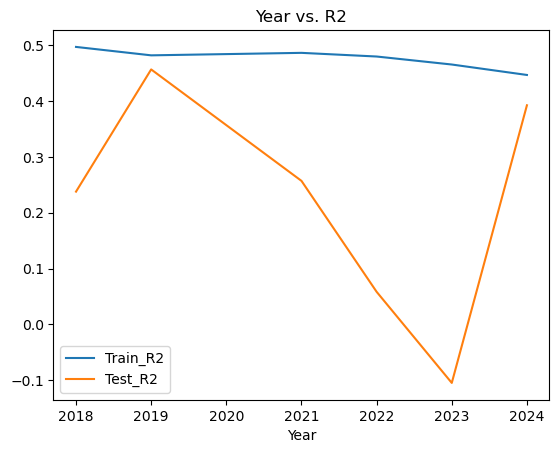

In [18]:
# Try predicting on different years using the last 10 years (2018-2023)
years = [2018,2019,2021,2022,2023,2024]
train_R2 = []
test_R2 = []

for i in range(len(years)):
    df_train = df[df['YEAR'] < years[i]]
    df_train = df_train[df_train['ROUND'] != 68]
    df_test = df[df['YEAR'] == years[i]]
    df_test = df_test[df_test['ROUND'] != 68]

    X_train = df_train.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND','WINS'], axis=1)
    y_train = df_train['WINS']
    X_test = df_test.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND','WINS'], axis=1)  
    y_test = df_test['WINS']

    # Fit 
    model = LinearRegression()
    model.fit(X_train, y_train)
    R2train = model.score(X_train, y_train)
    train_R2.append(R2train)
    # print("Train R^2 score:", R2train)
    # Predict
    y_pred = model.predict(X_test)
    # Score
    R2Test = model.score(X_test, y_test)
    test_R2.append(R2Test)
    # print("Test R^2 score:", R2)

results = pd.DataFrame()
results['Year'] = years
results['Train_R2'] = train_R2
results['Test_R2'] = test_R2

ax = results.plot(x='Year',y='Train_R2')
results.plot(x='Year',y='Test_R2',ax=ax)
plt.title('Year vs. R2')


In [19]:
results

,Year,Train_R2,Test_R2
0,2018,0.496965,0.237749
1,2019,0.481885,0.456649
2,2021,0.486340,0.257018
3,2022,0.479780,0.058296
4,2023,0.465453,-0.104913
5,2024,0.446737,0.392420


In [35]:
# y and yh are 2 numpy arrays.
def MAE(y,yh):
    # TODO: Complete this, replacing the "pass" placeholder.
    return (1/len(y))*(abs(y-yh).sum())
    

def MSE(y,yh):
    # TODO: Complete this.
    return (1/len(y))*((y-yh)**2).sum()

In [36]:
# Return yh, which is a np.array of length n, taken directly from the definition of SimpleBiasRegressor.
def SimpleBiasRegressor(b,n):
    return np.ones(n)*b # TODO: replace this.

Text(0, 0.5, 'B vs. MSE and MAE')

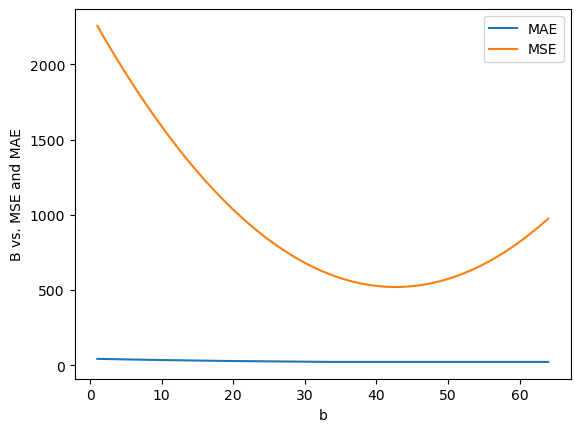

In [37]:
y = pd.concat([df_train['ROUND'],df_test['ROUND']],axis=0)

B = np.linspace(y.min(), y.max(), num = 10000)
mae = []
mse = []
for bias in B:
    mae.append(MAE(y, SimpleBiasRegressor(bias, len(y))))
    mse.append(MSE(y, SimpleBiasRegressor(bias, len(y))))

results = pd.DataFrame()
results['b'] = B
results['MAE'] = mae
results['MSE'] = mse

# TODO: plot the results
ax1 = results.plot.line(x='b',y='MAE')
results.plot.line(x='b',y='MSE',ax=ax1)
plt.ylabel('B vs. MSE and MAE')

In [38]:
results.iloc[results['MAE'].idxmin()]

b       32.005401
MAE     21.328125
MSE    633.462886
Name: 4921, dtype: float64

In [39]:
y.mean()

42.671875

In [40]:
y.value_counts()

ROUND
64    512
32    256
16    128
8      64
4      32
1      16
2      16
Name: count, dtype: int64

In [41]:
err = 1 - y.value_counts().max()/pd.concat([df_train,df_test],axis=0).shape[0]  # 0 # FIXME
print('baseline error rate',round(err,2))

baseline error rate 0.5
